# 词向量探索之旅——Histwords项目API调用教学

## 第一部分：从理论到实践

### 1.1 用好人工智能辅助编程

嗨！当你打开这份文件的时候，意味着你已经初步了解了词向量是什么，准备亲自动手探索词向量了。这份文件，就是对于如何利用斯坦福大学HistWords项目提供的开源词向量数据库，生成和分析词向量的教程，它会循序渐进地教会你完成你的小组项目所需要的大部分基础代码。

在开始之前，让我们先讨论一件事情。

大部分同学可能并未系统学习过Python，也没有尝试过亲自进行Python编程。这是完全正常的，**不会对你顺利完成这个项目产生任何影响**。你可以随时从大语言模型和讲师处获得帮助。

不知道你在日常的学习生活中，是否已经养成了使用ChatGPT、Gemini，或者国产的Kimi、DeepSeek、文心一言等大模型帮助自己解决问题的习惯？我们这个时代，正在面临新一轮的技术革命：大语言模型的诞生和兴起。几乎所有的知识和技术，都可以以极小的成本和极低的门槛通过大模型获取到，你只需要打开你最熟悉的那款大语言模型的聊天框，用准确、清晰的语言，向它描述你的需求和困难，在几轮对话后，你就能得到答案，在AI的帮助下解决问题。这意味着，知识和技术将会变得越来越廉价————每个人都可以在AI的帮助下，编写自己工作学习中所需要的代码，完成那些之前需要攀登陡峭的学习曲线后才能做成的工作。毫不夸张地说，**即使你在此之前完全没有接触过Python，只要你能够熟练地与AI对话、在对话中即时地学习和反馈，你就能独立完成一个中型编程项目，甚至比一个熟练掌握Python语言但不被允许使用AI的人完成得更快更好**。社会学家谢宇把这一社会转型描述为**后知识时代**的到来。

这个项目其实也意图训练你们拥有后知识时代里最核心的素质：**如何在大语言模型的帮助下，快速掌握一个完全陌生的领域的知识和技术；如何学会边做边学、在项目式的经历中即时地学习所需要的任何技能，而非先准备好所有所需的技能后才开始一个项目**。在接下来的几天里，你可能需要用代码实现自己各种各样的想法，处理很多的Bug、报错和未知的困难，这时，你可以回想这一段话。如果你拥有了这两条素质，那么在五天的项目结束后，你会很惊奇地发现————嘉宾好像没给我们仔细讲过Python，但我居然已经感受到了编程是怎么回事；下一次，当我遇到需要编程实现的奇思妙想，或者需要编程解决的工作难题，我也有了利用AI实现一切想法的经验。

所以，了解AI能做到什么、不能做到什么会很重要。

你需要了解，下面的内容是可以用AI解决的：

- 所有Python基础知识相关的问题；
- 你的代码中出现的几乎所有Bug和报错；
- 大部分常规的环境配置问题。

下面的内容，是AI原本并不知道，但是你把相关的知识补充给AI后，它们就能学会的：

- **本项目中的特殊代码。** 我们会调用斯坦福大学Histwords项目提供的数据库和API接口，这些接口是专属于这个项目的，AI事先并没有学过。举例来说，我们会频繁用到“计算两个词的余弦相似度”的代码，如果让AI写，AI会从头开始帮你实现怎么计算向量点积、除以模长、得到余弦值；但是，这个项目已经提供了现成的相应函数的API接口（后续会讲解），你并不需要从头造轮子。这个项目提供的对象、类和调用方法及其结构，也都是AI事先不知道的。如果你想让AI帮你解决问题，你就需要把相关的背景知识补充给它。后续会介绍我们所提供的可供参考的文档。

下面的内容，是可以与AI讨论，但必须运用你自己的想法来做出最终决定的：

- **你们小组的项目选题。** 词向量能做的事情很多，你会在课上听到很多前人做过的研究，从中得到灵感。我希望你可以从自己关心的问题入手，独立想出选题，这些创造性的工作不应该由AI代劳；
- **你们打算使用的研究方法。** 同上，AI可以给你们介绍许多你们可能并未了解过的词向量知识、统计技术、可视化方案等。但这些方法未必是非常适配你的项目的需求的，可以参考，但务必和AI讨论清楚、让它把它推荐的方法向你解释明白，然后由你独立判断是否适合；
- **结果的解释和写作。**

当然，在这份教程中，我也会在关键的部分，以注释的形式标注可能需要的Python知识。请确保你能够理解而当你遇到比较棘手的问题，你确信AI无法帮助你解决时，请随时联系嘉宾帮助。

### 1.2 你的工具箱：HistWords数据集简介

我们本次项目的核心研究工具，是由斯坦福大学的研究团队（William L. Hamilton, Jure Leskovec, Dan Jurafsky）开发的**HistWords项目** 。可以把它想象成一台“计算语言学的时间机器”。研究者们利用Google Books N-gram这一庞大的历史图书语料库，为从19世纪至今的每一个十年（decade）都训练了一套独立的Word2Vec词向量模型 。   

这意味着，我们不仅可以分析特定时间点（例如1980年）的语言文化模式，更可以进行**历时性（diachronic）**的比较，观察词语的意义、概念间的关系以及社会偏见是如何随着历史的演进而发生变化的。该项目最初的研究，就揭示了语义变迁的两个统计定律：“整合定律”（Law of Conformity，词频越高的词语义越稳定）和“创新定律”（Law of Innovation，多义性越强的词变化越快）。   

HistWords项目提供了多种语言的历时词向量，包括英语、法语、德语和中文。在本次项目中，我们提前为你下载好了**简体中文(chi-sim-all)、英文(eng-all)**的预训练模型。模型的数据来源于Google Books的简体中文图书语料，中文的时间跨度为1950年代至1990年代，每十年一个模型。这个时间段覆盖了从新中国成立初期、经历社会变革到改革开放后的关键历史时期，为我们探索中国现当代社会文化观念的变迁提供了极其宝贵的数据基础。英文的时间跨度为1800-2000年代，可以探究更长时间范围内的文化变迁。

在接下来的部分，我们将深入这个“时间机器”的内部，详细解析其数据结构，并学习如何用Python驾驭它，开启我们自己的研究探索之旅。


### 1.3 关键方法回顾：余弦相似度和语义投影

- **余弦相似度（Cosine Similarity）**：通过计算两个词向量之间的夹角余弦值，来衡量它们的语义接近程度。其值越接近1，表示两个词的语义越相似。这是我们进行探索性分析最基础、最直接的工具。

- **语义投影（Semantic Projection）**：这是一种更高级的技术，它允许我们先定义一个由反义词对集合构成的“语义轴”（例如，由“富有”和“贫穷”相关词汇定义的“财富轴”），然后将其他词语的向量投影到这个轴上，从而量化该词语在这一特定语义维度上的位置。我们在讲座中看到的Kozlowski等人关于“阶级”文化结构的研究，以及陈茁关于中国职业地位变迁的研究，都巧妙地运用了这一方法。

我们提供的API接口，**直接实现了余弦相似度（和相关方法）和语义投影的调用**，你需要学习如何使用我们编写好的简单接口，难度是非常低的，可以放心，基本只有改一改输入字符串的难度。如果你希望对产出的数据做进一步的分析和可视化，就需要自己（在AI的帮助下）编写进阶代码了。

### 1.4 其他说明

后续的代码单元格中，你会看到**两个关键注释标记**。如果你看到`# TRY`这个注释，意味着你被鼓励替换一下关键词（或者时间、模型等参数），看看不同的输出；如果你看到`# TODO`这个注释，意味着这部分的代码我们刻意地留下了一小段没有完成，你可以自行查找资料，或者在AI的帮助下，补全相关代码。

**让我们出发吧！**

## 第二部分：认识你的项目目录

在按照昨天的环境配置教程搭建好环境、进入你的工作目录之后，你应该会看见左边的文件栏。你需要认识下面几个文件夹：

- `chi-sim-all`：这里面存放了简体中文的词向量文件，以及简体中文的其他相关数据和代码。我们并不会用到其中的所有内容。后续将详细讲解这个文件夹下的内容，你不应修改其中的任何内容。
- `eng-all`, `fre-all`, `ger-all`：这里面存放了英文、法语、德语的词向量文件，结构和`chi-sim-all`完全相同，你不应该修改其中的任何内容。
- `histwords`：这里面存放了HistWords项目中的许多工具代码。一般来说，你不需要打开它，但是我们的项目中将会调用其中的代码。因此，你也不能修改其中的内容。
- `team1` `team2`：分别是第一组/第二组的项目文件夹。**你的所有编程工作，都应该在你对应小组的这个文件夹下完成**

### chi-sim-all文件夹结构说明

下面我们会以chi-sim-all为例，说明词向量文件夹下的数据结构和内容（eng-all完全同理）。理解这个文件夹的结构至关重要，因为它能帮助你准确地找到你需要的数据，无论你是想分析某个特定年代的词语关系，还是想追踪一个词语在几十年间的词性变化。让我们一起来直观看看这个文件的结构：

```
chi-sim-all/
├── sgns/
│   ├── 1950-w.npy
│   ├── 1950-vocab.pkl
│   ├── 1960-w.npy
│   ├── 1960-vocab.pkl
│   └── ... (其他年份)
│
├── pos/
│   ├── 1950-pos.pkl
│   ├── 1950-pos_counts.pkl
│   ├── 1960-pos.pkl
│   ├── 1960-pos_counts.pkl
│   └── ... (其他年份)
│
├── counts/
│   ├── 1950-counts.pkl
│   └── ... (其他年份)
│
├── freqs.pkl
├── avg_freqs.pkl
│
└── ... (其他文件夹和文件)
```

文件很多，对吧？不用害怕，在本项目中，除非你想探索一些非常非常特别的问题，我们只会用到`sgns`和`pos`这两个文件夹下的内容。让我们重点看看这两个核心的文件夹。

#### 词向量数据：`sgns/`

`sgns`是 "Skip-Gram with Negative Sampling" 的缩写，这是训练词向量模型（Word2Vec）的一种流行技术。简单来说，这个文件夹里存放的就是我们进行语义分析的核心原材料：**词向量**。

- **里面有什么？**

    - 该文件夹下，以年代（如1950, 1960, ...）命名了一系列文件。对于每一个年代，你都会找到两个关键文件：

        - `xxxx-w.npy`: 这是一个Numpy格式的矩阵文件，存放了该年代所有词语的向量。每一行都代表一个词的“坐标”。

        - `xxxx-vocab.pkl`: 这是一个Python的pickle文件，你可以把它理解成一个“花名册”。它记录了这个年代词汇表里所有的词语，并且顺序与 `.npy` 文件中的向量一一对应。

- **我们用它做什么？**

    - 当我们想知道1980年“市场”和“经济”有多相关时，我们需要从这里加载1980年的词向量。

    - 当我们想研究“同志”这个词的意义是如何随时间变迁时，我们需要加载所有年份的词向量进行历时比较。

总而言之，所有关于词义、语义相似度、类比推理的分析，都离不开这个文件夹里的数据。我们的词向量模型，是从这里加载的。

#### 词性数据：`pos/`

`pos` 是 "Part-of-Speech"（词性）的缩写。顾名思义，这个文件夹存放了与词语的词性相关的数据。

- **里面有什么？**

    - 和 sgns 类似，数据也是按年代组织的。对于每个年代，你主要会用到这个文件：

        - xxxx-pos.pkl: 这是一个字典文件。它的“键”（key）是具体的词语（比如“学习”），“值”（value）是这个词语对应的词性标签（比如 VERB 代表动词，NOUN 代表名词）。

- **我们用它做什么？**

    - 在进行分析时，我们可能只想关注名词或动词的变化，这时就可以利用 pos 文件夹里的数据来筛选词语。例如，你想研究“革命”这个词，但只关心它作为名词时的用法变迁，不关心它作为动词的用法。这时，你就可以通过这个文件夹的数据，将分析限定在特定词性的词语上。

    - 或者，在查询近邻词时，我们可以用词性来筛选。比如，你想知道不同年代里“市场”的形象是什么，你可以查询与市场最相关的**形容词**是哪些，这就也会用到这个文件夹。

#### 其他文件夹（选读）

`chi-sim-all` 还包含其他一些有用的数据，在这里我们简单提及，感兴趣的同学可以自行探索或阅读文件夹内的 `README.md` 文件了解更多细节：

- `counts/`: 记录了每个词在不同年代出现的频率。可以用来分析词语的流行度变化。

- `freqs.pkl` / `avg_freqs.pkl`: 汇总了所有年份的词频信息。

- `netstats` /, `volstats`/, `word_lists`/: 这些包含了一些更高级的统计数据，如共现网络、词义漂移的量化统计等，适合有余力的同学进行探索性研究。

--- 

**总结一下**：对于我们接下来的项目实践，你最需要关注的就是 sgns 文件夹（用于获取词向量）和 pos 文件夹（用于按词性筛选词语）。希望这份指南能帮助你更好地理解我们的数据，为接下来的编程实践打下坚实的基础！

## 第三部分：动手实践——用Python让词向量活起来

理解了数据的结构之后，我们现在进入最激动人心的部分：动手编写代码，从这些沉睡的向量中挖掘出鲜活的文化洞见。本部分将提供一份“研究者食谱”，通过具体的Python代码示例，一步步展示如何加载数据、执行分析并解读结果。

### 3.1. 面向对象编程：更优雅的工具箱

在之前的课程中，我们可能会编写一系列独立的函数来加载数据、计算相似度等。这种方式虽然直接，但当分析变得复杂时，代码会显得零散。现在，我们将引入一种更强大、更优雅的编程范式——**面向对象编程（Object-Oriented Programming, OOP）**。

OOP的核心思想是将**数据**和操作这些数据的**函数**打包在一起，形成一个“**对象（Object）**”。你可以把对象想象成一个智能工具箱：它不仅装着你需要的所有工具（数据，如词向量），还自带了使用说明书和操作按钮（函数，我们称之为“方法”）。

为了方便大家使用HistWords数据集，项目已经提供了两个预先编写好的Python类（Class，即创建对象的蓝图）：`Embedding` 和 `SequentialEmbedding`。

`Embedding` 对象：用于处理单个时间点的词向量模型。它就像一个特定年代（如1980年）的“语言快照”工具箱。

`SequentialEmbedding` 对象：用于处理跨越多个时间点的词向量模型序列。它是一个更强大的工具箱，管理着一系列按时间排序的 `Embedding` 工具箱。

我们将使用这两个类中预先定义好的方法，来极大地简化我们的代码。

### 3.2 环境设置

In [21]:
import sys
sys.path.append('../histwords')
sys.path.append('..')
# 把我们的“工具箱”加入系统路径，让import时可以找到对应类

# 导入我们即将使用的两个核心类
from histwords.representations.embedding import Embedding
from histwords.representations.sequentialembedding import SequentialEmbedding

# 设置Numpy打印选项，增强可读性
import numpy as np
np.set_printoptions(legacy='1.21')

### 3.3 `Embedding`类：静态（单一时间点）的词向量模型

这一部分，我们会讲解`Embedding`类提供的接口。这个类用来加载单个模型，可以研究某个静态时间点的情况。

#### 3.3.1 词向量模型的加载（单个时间点）

In [22]:
# 加载1980年代的模型，这将返回一个Embedding对象。

PATH = '../chi-sim-all/sgns/' # 声明一下相对路径，方便系统找到我们的模型文件
embedding_1980 = Embedding.load(PATH + '1980')

print(embedding_1980)


In [23]:
# TRY 请你尝试：在下面加载其他年代的模型，并赋值给对象：比如embedding_1990



#### 3.3.2 从模型中读取词向量

每个`Embedding`对象都有一个 `.represent()` 方法，可以轻松获取词语的向量。使用方法参考：

In [24]:
# 获取“改革”一词的向量
reform_vector = embedding_1980.represent('改革')
print("“改革”的向量维度:", reform_vector.shape)
print("“改革”的向量表示:", reform_vector)

“改革”的向量维度: (300,)
“改革”的向量表示: [ 7.12827938e-02  9.24179448e-02 -3.76439605e-02 -1.66352252e-02
 -5.94081851e-02 -4.62243094e-02  2.67668692e-02  2.26890858e-02
 -1.26379660e-01 -2.90105980e-02 -3.94488225e-02  5.49707738e-02
  4.85823099e-02  9.94467225e-02  7.16621984e-03  3.82762364e-02
 -2.52115832e-02 -3.94581336e-02 -5.44802851e-02 -5.76786451e-02
  1.52211946e-02 -7.13502741e-02 -4.17862371e-02  1.01826852e-01
  5.06675308e-02  2.77879030e-02 -1.91703104e-02  9.75740173e-02
  2.07863972e-03  7.28746868e-02  7.35421447e-02 -5.71982271e-02
  7.19362524e-02  6.52270392e-02  6.36329802e-02  1.09146829e-01
 -4.61089806e-02  8.96198570e-02 -4.61773759e-02 -4.55854433e-02
 -7.70556549e-02 -1.10934230e-01  3.11359423e-02  7.49780907e-02
  4.43915490e-03  6.08776186e-02  1.16122338e-01  5.53405456e-02
 -4.62949305e-02  1.57722303e-02  7.80566486e-02 -1.56156266e-02
  4.12220621e-02  5.10522053e-02 -1.89452503e-02  1.10691421e-02
  1.12152852e-01  2.01196525e-02  4.00288469e-02 -1.40381835e

In [25]:
# TRY 请你尝试：
# 1. 获取“改革”在其他年代（比如1960）的词向量，并看看它的前十位；
# 2. 看看其他词汇的向量表示



#### 3.3.3 寻找向量的近邻词

使用 `.closest(word, n)` 方法可以找到最相似的词。它返回一个 (相似度分数, 词语) 的元组列表。其中，`n`是调整相似词数量的参数

In [26]:
# 寻找1980年代“改革”的近邻词
neighbors_of_reform = embedding_1980.closest('国家', n=10)

print("\n1980年代“国家”的十大近邻词:")
for score, word in neighbors_of_reform:
    print(f"{word}: {score:.3f}")
    
# TRY：修改上面的代码，看看其他你感兴趣的词的近邻词


1980年代“国家”的十大近邻词:
国家: 1.000
国: 0.466
老牌: 0.432
西非: 0.387
拉美: 0.385
建委: 0.361
南美: 0.359
挥霍: 0.358
款额: 0.354
沦: 0.351


#### 3.3.4 计算两个词的相似性

使用 `.similarity(word1, word2)` 方法可以计算两个词的相似性（余弦值）。它接受两个字符串作为参数，返回一个浮点数。

In [27]:
# 计算1980年代“改革”“开放”的相似度

sim = embedding_1980.similarity("音乐", "歌曲")
print(f'{sim:.4f}')

# TRY：试试别的词对；对比若干词对的相似度

0.4145


#### 3.3.5 （选学）其他`Embedding`类接口

| 方法名                     | 功能说明                                                                 | 示例代码                                                                                      |
|--------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `vec_closest(vec, n=10)` | 输入一个向量 `vec`（这个向量并不要求对应有意义的词），返回与其最接近的前 `n` 个词及其相似度。常用于语义轴投影或聚类后寻找最近词。 | `vec = embedding["king"] - embedding["man"] + embedding["woman"]`<br>`print(embedding.vec_closest(vec))` |
| `oov(w)`                  | 判断词 `w` 是否是 OOV（不在词表中）。返回布尔值。                         | `print(embedding.oov("flibbertigibbet"))  # True`<br>`print(embedding.oov("freedom"))  # False` |


### 3.4 `SequentialEmbedding`类：动态（多个时间点）的词向量模型

对于我们大部分的历时性研究，`SequentialEmbedding` 类是更强大的工具。它能一次性加载所有年代的模型，并提供专门用于跨时间比较的方法。

#### 3.4.1 加载历时模型序列：
我们使用 SequentialEmbedding.load()来加载模型序列，并提供数据集的根目录和需要加载的年代列表。

In [28]:
# 定义我们要研究的时间跨度
decades = range(1950, 2000, 10) # 请你自行学习Python的range语法。举例来说，range(1950, 2000, 10)的意思是：从1950开始，每10年一步，一直读到2000（不包含2000本身），返回一个list

# 加载从1950到1990的所有年代模型，这将返回一个SequentialEmbedding对象
# 注意路径是chi-sim-all_sgns的父目录

# 定义路径
PATH = '../eng-all/sgns/'
seq_embeddings = SequentialEmbedding.load(PATH, years=decades)

print(seq_embeddings)

#### 3.4.2 计算某两个词随时间的相似度变化

`SequentialEmbedding`对象的 `.get_time_sims(word1, word2)` 方法允许我们追踪查看两个词的相似度如何变化，帮助我们理解两个概念的关系演变。它返回的是一个有序字典

In [29]:
sim_time = seq_embeddings.get_time_sims("america","pizza")
print(sim_time)

OrderedDict([(1950, 0.0), (1960, 0.0), (1970, -0.03898073311408213), (1980, 0.07368909282561441), (1990, -0.08996480685688388)])


你可以用下面的代码来做简单的可视化。如果你想加标题等图表美化工作，请咨询AI

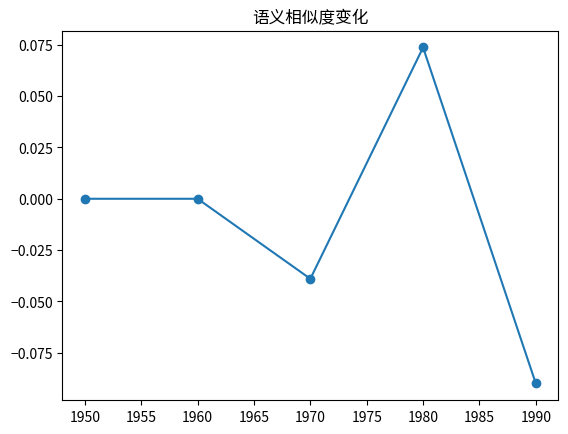

In [30]:
import matplotlib.pyplot as plt
import zhplot # 这一行的作用是让matplotlib画图支持中文

data = sim_time
plt.plot(data.keys(), data.values(), marker='o')
plt.title("语义相似度变化")
plt.show()

#### 3.4.3 追踪语义近邻的变迁

`SequentialEmbedding`对象的 `.get_seq_closest_by_year()` 方法允许我们追踪历时性的语义近邻变化。这个方法可以直观地展示一个核心概念的内涵是如何随时间演变的。它返回的是一个有序字典

In [31]:
seq_embeddings.get_seq_closest_by_year('america',n=5)

# TRY：换别的词看看

{1950: [(1.0000000000000004, 'america'),
  (0.5251389216878652, 'africa'),
  (0.5097785043993095, 'europe'),
  (0.47484069733827383, 'americas'),
  (0.4744154297614141, 'continent')],
 1960: [(1.0, 'america'),
  (0.6769528873167995, 'celanese'),
  (0.6588042726072783, 'microfilming'),
  (0.4973507991654961, 'rippy'),
  (0.49324042328916273, 'europe')],
 1970: [(1.0, 'america'),
  (0.6315755024622464, 'nacla'),
  (0.52465142071711, 'europe'),
  (0.5236928637442293, 'latin'),
  (0.5018054972650802, 'americas')],
 1980: [(1.0000000000000004, 'america'),
  (0.5214027133021784, 'europe'),
  (0.5132984810486553, 'africa'),
  (0.4900335106572291, 'latin'),
  (0.47979270042829614, 'caribbean')],
 1990: [(1.0, 'america'),
  (0.4967210265522243, 'caribbean'),
  (0.4875159000627951, 'europe'),
  (0.4644201163653463, 'africa'),
  (0.4582563320217501, 'latin')]}

我们为你提供了下面的工具函数，来进行语义变迁的可视化：`visualize_semantic_change(word, embedding_path, years)`

In [32]:
import sys
import os
sys.path.append(r"../histwords")
sys.path.append(r"../histwords/viz/scripts/")
# 导入我们即将使用的核心类
from histwords.representations.embedding import Embedding
from histwords.representations.sequentialembedding import SequentialEmbedding
from histwords.viz.scripts import helpers
import matplotlib.pyplot as plt
import zhplot  # 中文显示支持

def visualize_semantic_change(word, embedding_path, years):
    """可视化某个词的语义变迁轨迹"""
    
    # 加载词向量模型
    embeddings = SequentialEmbedding.load(embedding_path, years)
    
    # 获取语义近邻数据
    time_sims, lookups, nearests, sims = helpers.get_time_sims(embeddings, word)
    
    # ✅ 过滤掉单字和重复目标词本身（如“民主”）
    filtered_words = []
    filtered_values = []
    for w in lookups:
        w_clean = w.split("|")[0]
        
        # ✅ 排除掉单字 + 不是主词时才加入散点（图上不需要）
        if len(w_clean) > 1:
            filtered_words.append(w)
            filtered_values.append(lookups[w])
    
    # t-SNE降维
    fitted = helpers.fit_tsne(filtered_values)
    
    # 配置绘图参数
    plt.figure(figsize=(4, 4))
    cmap = helpers.get_cmap(len(time_sims))
    
    # 绘制散点图和注释
    helpers.clear_figure()
    annotations = helpers.plot_words(word, filtered_words, fitted, cmap, sims)
    helpers.plot_annotations(annotations)
    
    # 设置标题
    plt.title(f'「{word}」的语义变迁轨迹 ({years[0]}–{years[-1]})', fontsize=14, pad=20)
    
    # 添加图例
    for i, year in enumerate(time_sims.keys()):
        plt.scatter([], [], c=[cmap(i)], label=str(year))
    plt.legend(title='年份', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 调整布局
    plt.tight_layout()
    
    # 打印统计信息
    print(f"\n---「{word}」各年代的高相似近邻数量（sim > 0.3）---")
    for year, simlist in time_sims.items():
        print(f"{year}: {len(simlist)} 个词")

    return plt.gcf()



GET TIME SIMS FOR america TOOK 0.2917602062225342
FIT TSNE TOOK 0.25221896171569824
[ 1.6935102 -2.315201 ] [ 1.7773755 -2.2880092]
[ 1.7773755 -2.2880092] [ 1.6192572 -1.8861257]
[ 1.6192572 -1.8861257] [ 1.5478309 -1.8858904]
[ 1.5478309 -1.8858904] [ 1.740508  -1.5756037]

---「america」各年代的高相似近邻数量（sim > 0.3）---
1950: 10 个词
1960: 10 个词
1970: 10 个词
1980: 10 个词
1990: 10 个词


<Figure size 400x400 with 0 Axes>

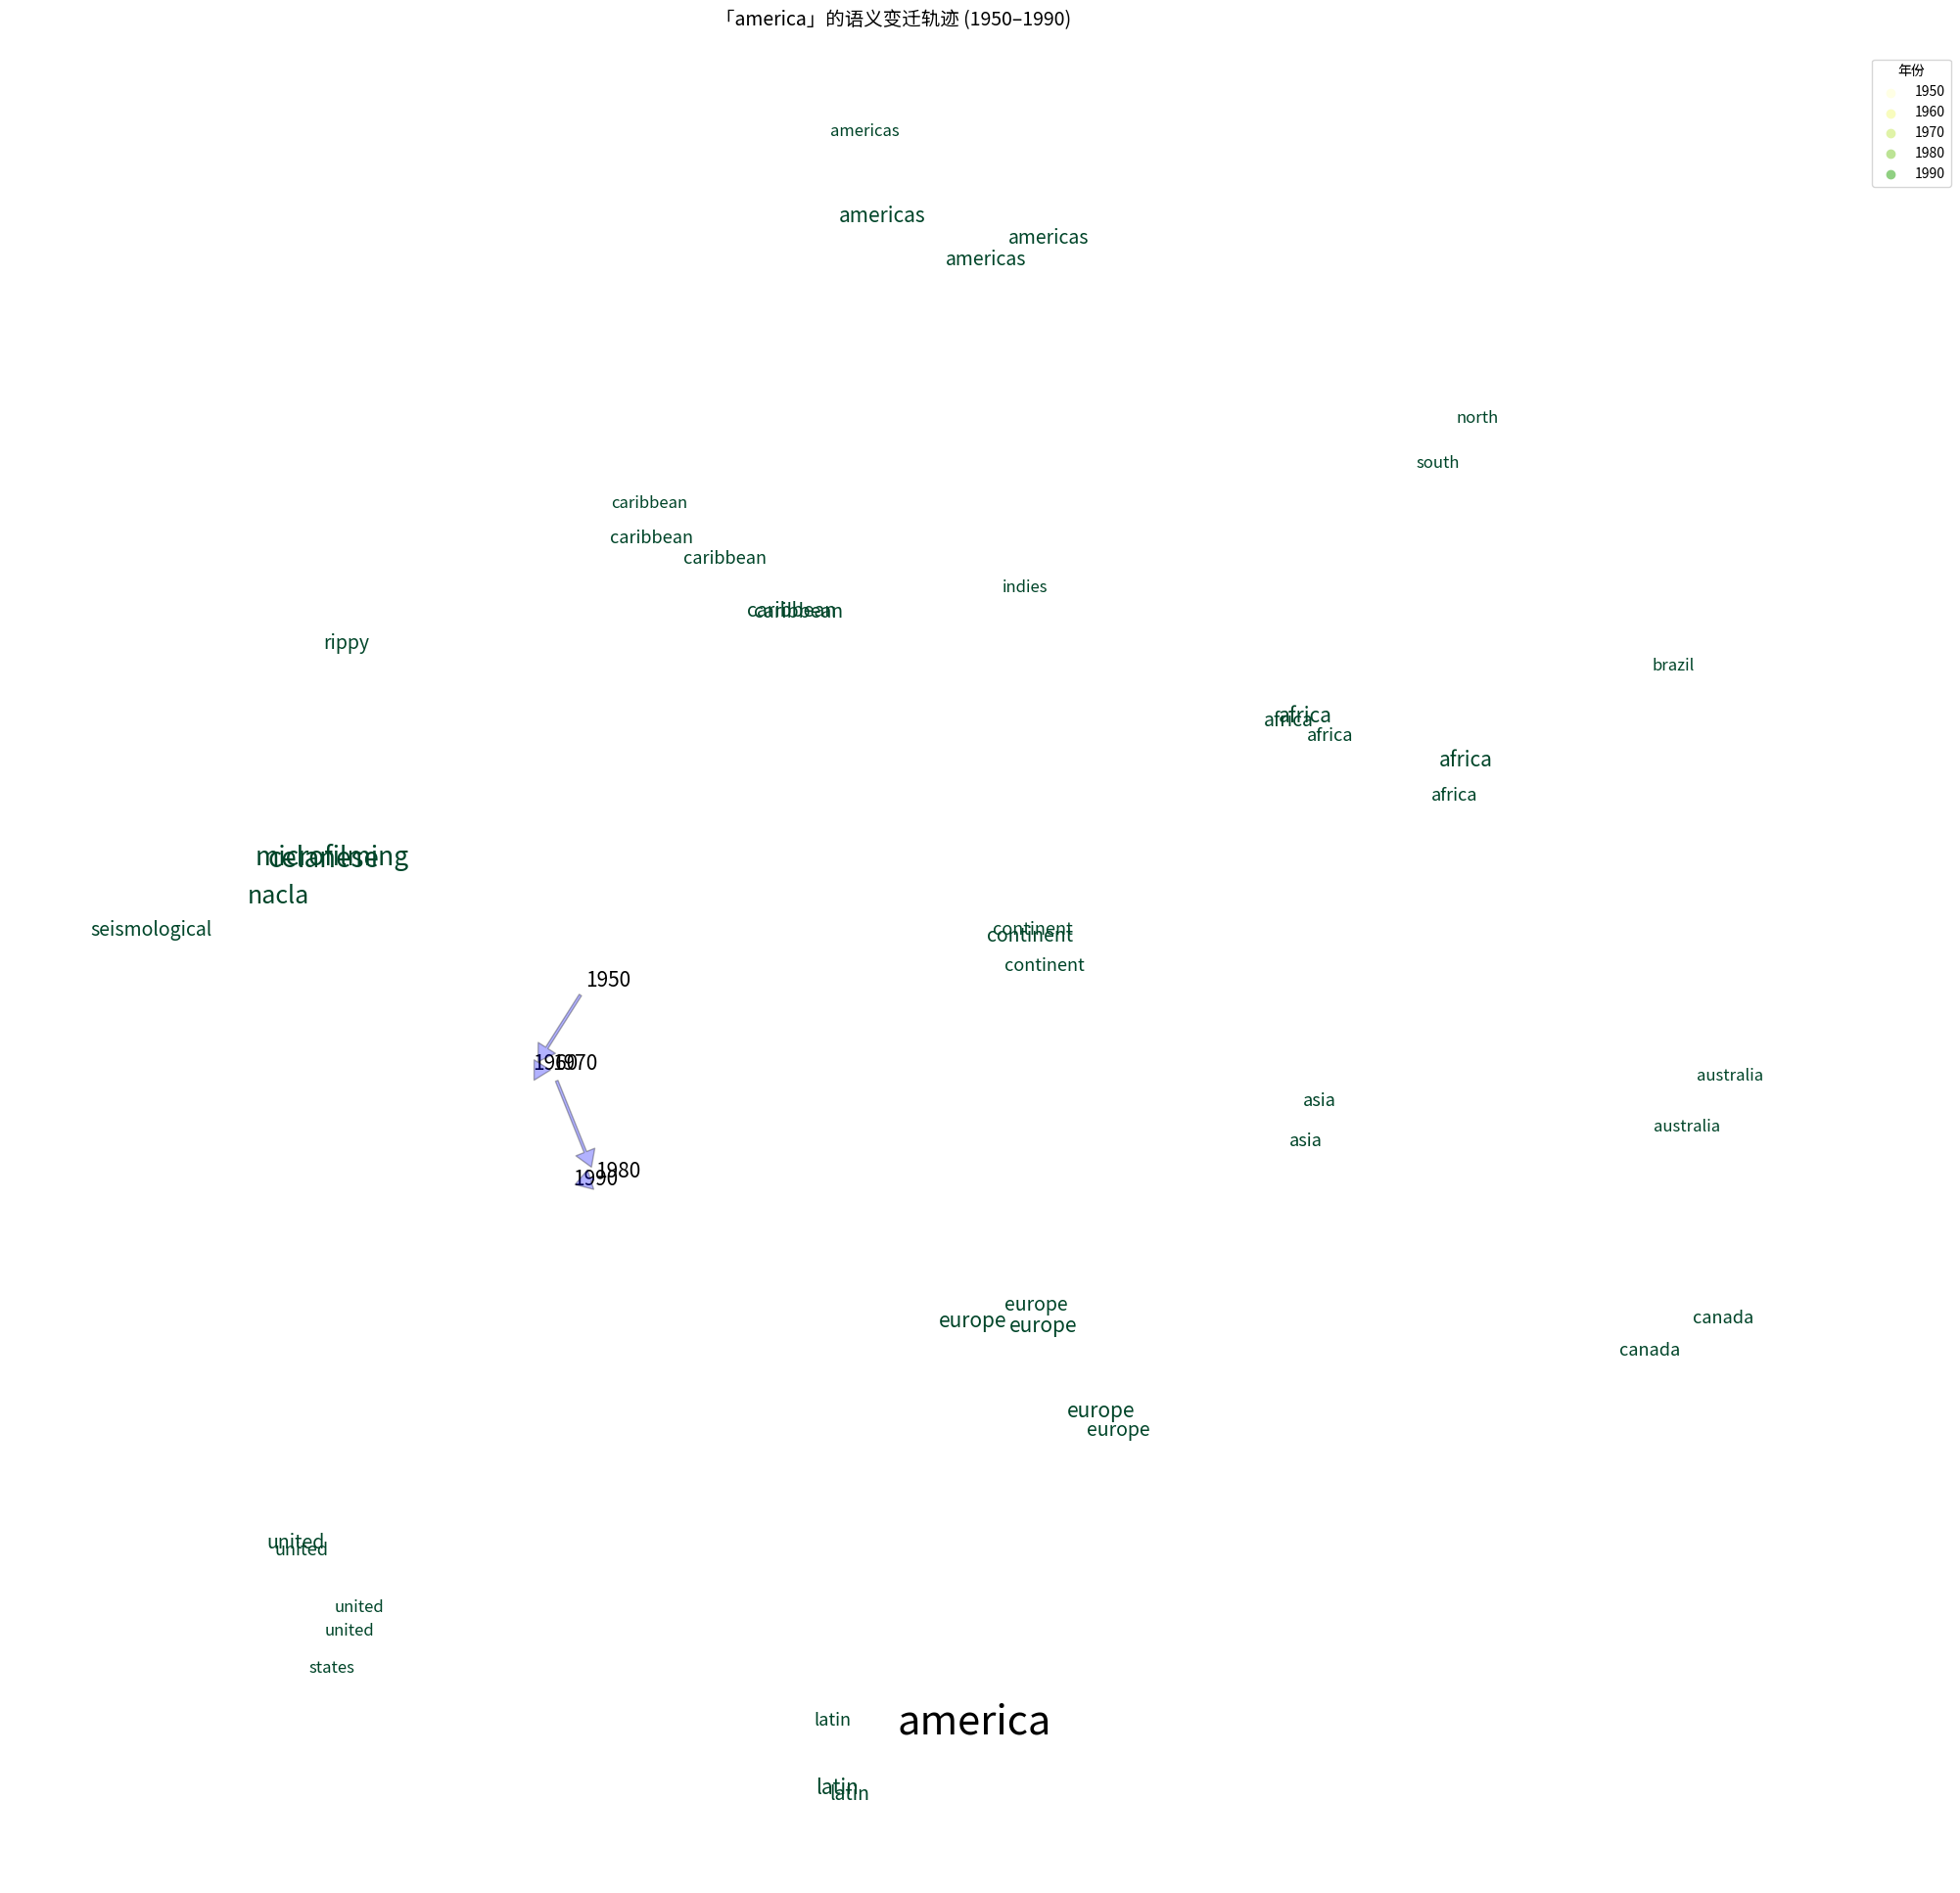

In [33]:
# 设置参数并调用函数
embedding_path = r"../eng-all/sgns"
years = [1950, 1960, 1970, 1980, 1990]

# 生成可视化
fig = visualize_semantic_change("america", embedding_path, years)

# 显示图形
plt.show()

#### 3.4.4 获取所有年份的邻居

方法`.get_seq_neighbour_set(word, n=5):`允许你一次性获取某个词在所有年份中最接近的邻居，返回的数据格式是`set`

In [34]:
neigh_set = seq_embeddings.get_seq_neighbour_set('科学家', n=5)
print(neigh_set)

# TRY：换别的词看看

[OOV] 词科学家不在词表中
[OOV] 词科学家不在词表中
[OOV] 词科学家不在词表中
[OOV] 词科学家不在词表中
[OOV] 词科学家不在词表中
{'с', 'œuvre', 'о', 'со', 'œuvres'}


### 3.5 学会语义投影

语义轴投影是最强大的方法之一，它允许我们量化一个词在语义轴（反义词对）上的位置。`Embedding`和`SequentialEmbedding`对象分别实现了相应的方法，可以简单地返回目标词在语义轴上的投影分数。让我们学习一下调用语义投影方法。

#### 3.5.1 单一时间点的语义投影

如果你只打算使用单一时间点上的词向量模型，那么我们的`.get_projection(positive_words, negative_words, target_word)`为你提供了非常方便的工具。在这个方法中，`positive_words`和`genative_words`是两个字符串列表，分别接受正向词和反向词，用来构建语义轴；`target_word`是一个字符串，是你要测量的对象。让我们看看具体示例：

In [35]:
# 还是先加载模型

embedding_1990 = Embedding.load(PATH + '1990')

In [36]:
# 构建正/反义词对：

male_words = ['男人','男性','男','男子','男孩']
female_words = ['女人','女性','女','女子','女孩']

# 计算投影

embedding_1990.get_projection(male_words, female_words, '红')

[提示] 缺失词：正向词: 男人, 男性, 男, 男子, 男孩 反向词: 女人, 女性, 女, 女子, 女孩 目标词: 红
目标词不在词表中，无法计算


#### 3.5.2 多时间点的语义投影

如果你打算使用多时间点的词向量模型，即`SequentialEmbedding`类，那么我们的`get_projection_by_year(self, positive_words, negative_words, target_word)`会帮到你。参数含义和上面是一样的

In [37]:
years = range(1950, 2000, 10)
seq_embeddings = SequentialEmbedding.load(PATH, years)

In [38]:
male_words = ['男人','男性','男','男子','男孩']
female_words = ['女人','女性','女','女子','女孩']

# 计算投影

seq_embeddings.get_projection_by_year(male_words, female_words, '教师')

[提示] 1950 年词表中缺失词汇：正向词: 男人, 男性, 男, 男子, 男孩 反向词: 女人, 女性, 女, 女子, 女孩 目标词: 教师
[提示] 1960 年词表中缺失词汇：正向词: 男人, 男性, 男, 男子, 男孩 反向词: 女人, 女性, 女, 女子, 女孩 目标词: 教师
[提示] 1970 年词表中缺失词汇：正向词: 男人, 男性, 男, 男子, 男孩 反向词: 女人, 女性, 女, 女子, 女孩 目标词: 教师
[提示] 1980 年词表中缺失词汇：正向词: 男人, 男性, 男, 男子, 男孩 反向词: 女人, 女性, 女, 女子, 女孩 目标词: 教师
[提示] 1990 年词表中缺失词汇：正向词: 男人, 男性, 男, 男子, 男孩 反向词: 女人, 女性, 女, 女子, 女孩 目标词: 教师


{1950: None, 1960: None, 1970: None, 1980: None, 1990: None}

恭喜你！你已经通关了本教程。

你已经学会了如何调用我们提供的API接口。

接下来，你可能有一些更个性化的任务需要完成，你就需要自己完成代码啦。如果遇到困难，随时向AI或嘉宾咨询。

**祝你好运！**

# 美国态度变化分析（1800–2000）
本Notebook基于HistWords英文词向量数据，分析美国在1800-2000年期间对中国、德国、日本、英国、墨西哥和非洲的态度变化。

In [39]:
# 导入所需库
from histwords.representations.embedding import Embedding  # 用于加载词向量模型
import numpy as np  # 数值计算库
import pandas as pd  # 数据处理库
import matplotlib.pyplot as plt  # 可视化绘图库


In [40]:
# 设置分析的年份区间，每25年一个节点
years = list(range(1800, 1990, 10))

# 模型文件路径（以英文语料为基础）
PATH = '../eng-all/sgns/'

# 加载每个年份的词向量模型，存入字典中
embeddings = {year: Embedding.load(PATH + str(year)) for year in years}


In [41]:
# 积极态度关键词
positive_words = ["democracy", "stable", "wealthy", "friend", "civilized", "technological"]

# 消极态度关键词
negative_words = ["dictatorship", "unstable", "poor", "enemy", "barbaric", "backward"]

# 分析对象国家
countries = ["china", "germany", "japan", "britain", "mexico", "africa"]


In [42]:
# 定义函数：计算某个国家与某组关键词的平均相似度
def average_similarity(embedding, target, word_list):
    if target not in embedding:
        return None  # 如果目标词不存在于词向量中，则返回空
    sims = [embedding.similarity(target, word) for word in word_list if word in embedding]
    return np.mean(sims) if sims else None

# 遍历每年每个国家，计算积极、消极和“净态度”得分
data = []
for year, emb in embeddings.items():
    for country in countries:
        pos = average_similarity(emb, country, positive_words)
        neg = average_similarity(emb, country, negative_words)
        if pos is not None and neg is not None:
            data.append({
                "year": year,
                "country": country,
                "positive": pos,
                "negative": neg,
                "net_attitude": pos - neg  # 净态度 = 积极相似度 - 消极相似度
            })

# 组织成表格形式便于分析
df = pd.DataFrame(data)
df.head()


,year,country,positive,negative,net_attitude
0,1800,china,0.057686,-0.017413,0.075098
1,1800,germany,0.081448,-0.001293,0.082741
2,1800,japan,0.043786,-0.008137,0.051923
3,1800,britain,0.058493,-0.004853,0.063346
4,1800,mexico,0.034809,-0.016051,0.050860


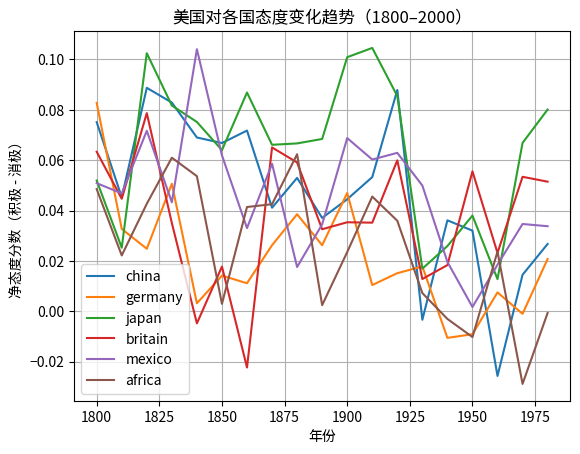

In [43]:
# 按国家绘制净态度变化曲线
for country in countries:
    subset = df[df["country"] == country]
    plt.plot(subset["year"], subset["net_attitude"], label=country)

plt.title("美国对各国态度变化趋势（1800–2000）")
plt.xlabel("年份")
plt.ylabel("净态度分数（积极 - 消极）")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
import os
import numpy as np
import pandas as pd
from histwords.representations.embedding import Embedding

# 年份和模型路径
years = [1800, 1850, 1900, 1950, 1990, 2000]
PATH = '../eng-all/sgns/'

# 国家和反义词对设置
positive_words = ["democracy", "stable", "wealthy", "friend", "civilized", "technological"]
negative_words = ["dictatorship", "unstable", "poor", "enemy", "barbaric", "backward"]
countries = ["china", "germany", "japan", "britain", "mexico", "africa"]

# 加载词向量模型
embeddings = {}
for year in years:
    model_path = PATH + str(year)
    if os.path.exists(model_path + "-w.npy"):
        embeddings[year] = Embedding.load(model_path)
    else:
        print(f"⚠️ 跳过年份 {year}，模型文件不存在。")

# 计算：每个国家在每组反义词维度的态度差值
def average_similarity(embedding, target, word_list):
    if target not in embedding:
        return None
    sims = [embedding.similarity(target, word) for word in word_list if word in embedding]
    return np.mean(sims) if sims else None

# 存储每个国家对应的 DataFrame 表格
country_tables = {}
for country in countries:
    records = []
    for year, emb in embeddings.items():
        row = {"year": year}
        for p_word, n_word in zip(positive_words, negative_words):
            if country in emb and p_word in emb and n_word in emb:
                pos_sim = emb.similarity(country, p_word)
                neg_sim = emb.similarity(country, n_word)
                row[f"{p_word}_vs_{n_word}"] = pos_sim - neg_sim
            else:
                row[f"{p_word}_vs_{n_word}"] = np.nan
        records.append(row)
    df = pd.DataFrame(records)
    country_tables[country] = df
    display(df.style.set_caption(f"{country.title()} 态度变化表"))


⚠️ 跳过年份 2000，模型文件不存在。


,year,democracy_vs_dictatorship,stable_vs_unstable,wealthy_vs_poor,friend_vs_enemy,civilized_vs_barbaric,technological_vs_backward
0,1800,-0.008873,-0.005554,0.179273,0.053694,0.230187,0.001864
1,1850,0.027066,0.110762,0.088219,0.055516,0.050236,0.069077
2,1900,0.094757,0.043436,0.154619,-0.090684,0.012333,0.052494
3,1950,0.039033,-0.013637,0.097860,-0.061153,0.042463,0.087510
4,1990,0.082698,-0.024382,0.048495,-0.087277,0.110826,0.013633


,year,democracy_vs_dictatorship,stable_vs_unstable,wealthy_vs_poor,friend_vs_enemy,civilized_vs_barbaric,technological_vs_backward
0,1800,0.185005,-0.067358,0.140247,-0.110045,0.268760,0.079839
1,1850,0.114669,-0.041090,0.081589,-0.026620,0.011785,-0.055413
2,1900,0.121426,0.032677,0.043233,-0.003782,0.075837,0.012458
3,1950,0.004651,-0.016526,-0.033351,-0.126494,0.064240,0.052684
4,1990,0.021220,-0.041996,0.097187,-0.123248,0.059382,0.057758


,year,democracy_vs_dictatorship,stable_vs_unstable,wealthy_vs_poor,friend_vs_enemy,civilized_vs_barbaric,technological_vs_backward
0,1800,0.039991,0.022137,0.212899,-0.068878,0.146942,-0.041554
1,1850,0.076442,-0.027226,0.143982,0.110979,0.065476,0.014257
2,1900,0.109518,0.120133,0.205915,-0.035911,0.129130,0.076607
3,1950,0.089597,-0.062497,0.117877,-0.138888,0.066333,0.155618
4,1990,0.185696,-0.005312,0.093216,-0.076409,0.100792,0.142164


,year,democracy_vs_dictatorship,stable_vs_unstable,wealthy_vs_poor,friend_vs_enemy,civilized_vs_barbaric,technological_vs_backward
0,1800,0.082129,0.013874,0.055876,-0.124599,0.157420,0.195376
1,1850,0.016763,0.015687,-0.010701,-0.059946,0.042456,0.102154
2,1900,0.034628,-0.037953,0.113065,-0.039530,0.122397,0.019439
3,1950,0.158851,0.003474,0.092329,0.026232,0.036177,0.016308
4,1990,0.132705,0.053431,0.104300,-0.044484,0.049956,-0.012271


,year,democracy_vs_dictatorship,stable_vs_unstable,wealthy_vs_poor,friend_vs_enemy,civilized_vs_barbaric,technological_vs_backward
0,1800,0.106683,-0.147416,0.250040,-0.203819,0.204031,0.095642
1,1850,0.143747,0.052457,0.157949,-0.046369,-0.009117,0.072930
2,1900,0.054270,0.022363,0.111410,-0.057961,0.168527,0.114037
3,1950,-0.085198,-0.082158,0.063980,0.033819,0.028105,0.051577
4,1990,0.028566,0.139095,0.157172,0.005767,0.105784,0.103746


,year,democracy_vs_dictatorship,stable_vs_unstable,wealthy_vs_poor,friend_vs_enemy,civilized_vs_barbaric,technological_vs_backward
0,1800,0.004326,-0.107835,0.180675,-0.086746,0.233876,0.066693
1,1850,-0.000486,-0.012587,0.084377,-0.060136,0.023885,-0.017437
2,1900,0.023381,0.046682,0.056122,-0.118901,0.095365,0.038334
3,1950,0.087033,-0.029892,-0.035096,-0.068441,0.003167,-0.018280
4,1990,0.084623,0.038806,-0.066174,-0.076738,0.127573,0.045544


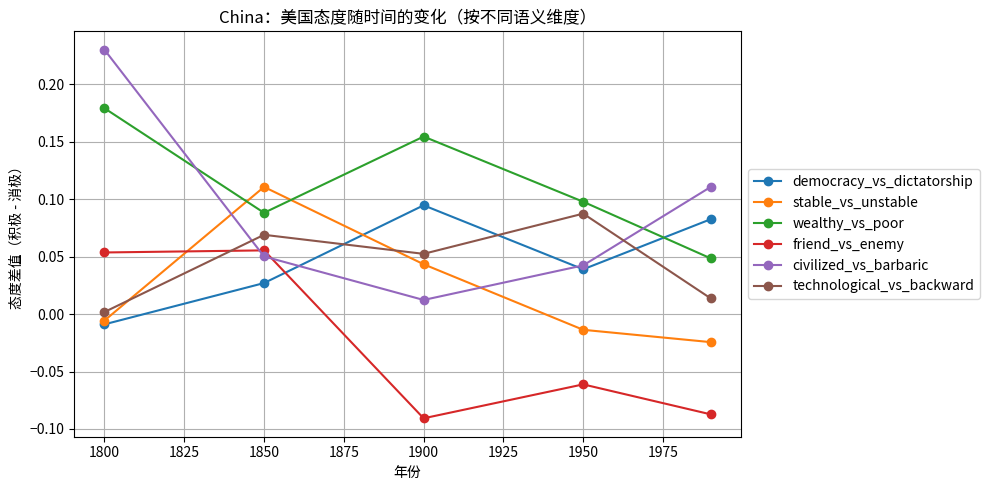

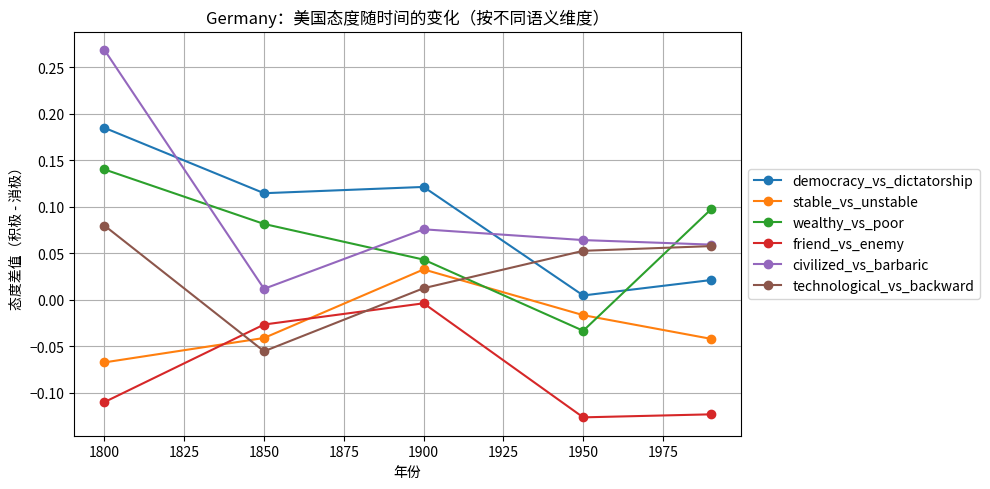

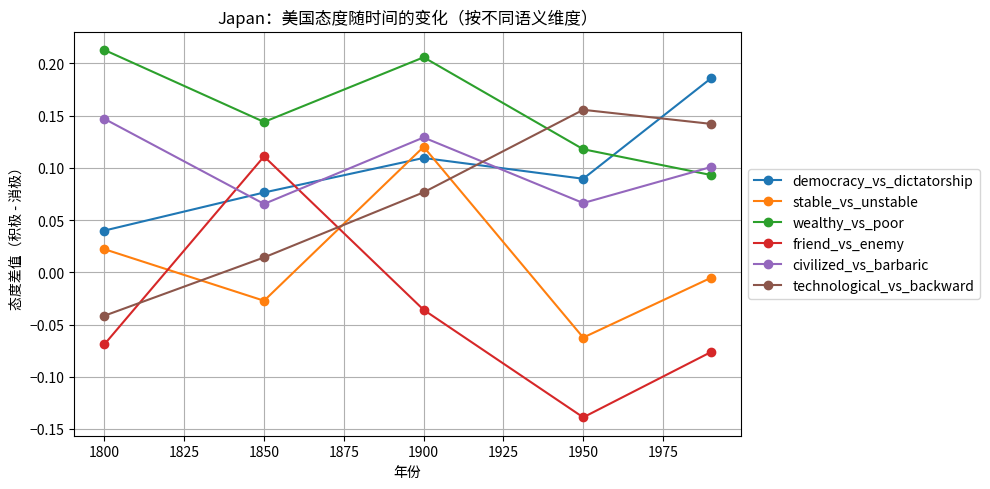

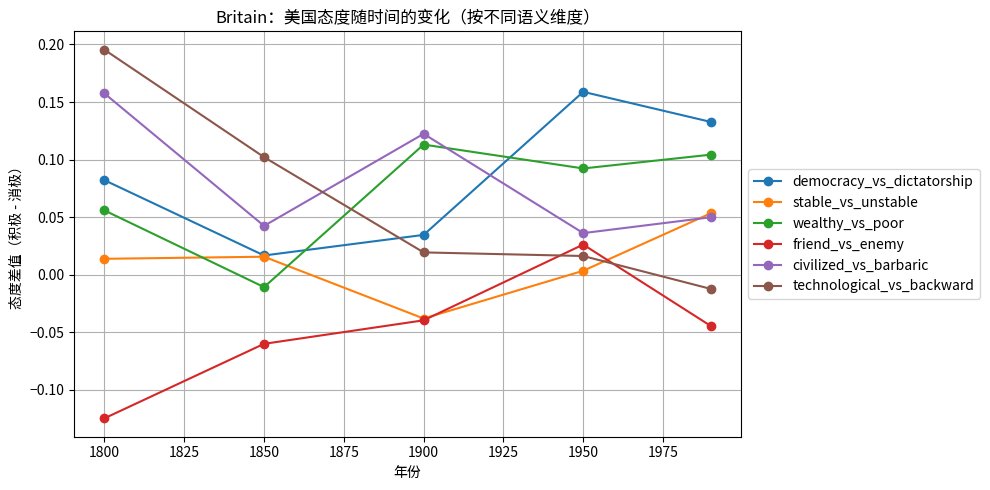

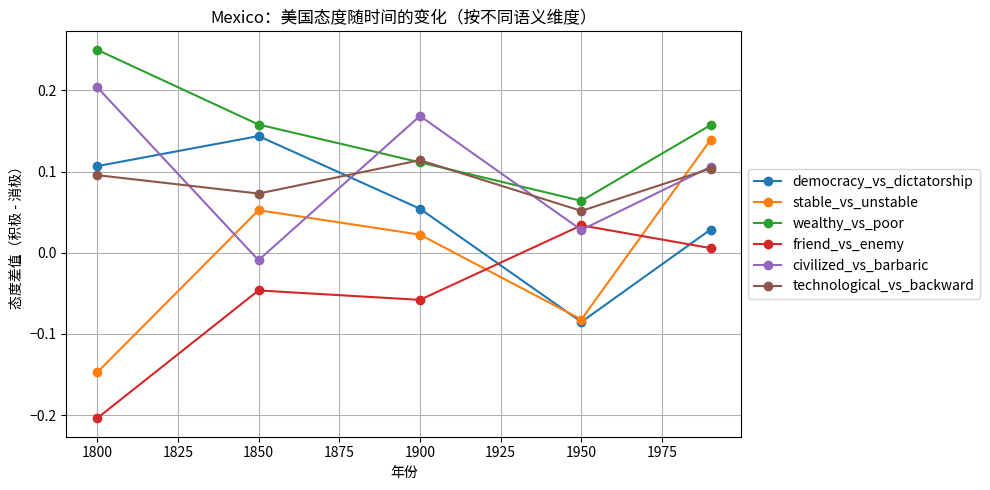

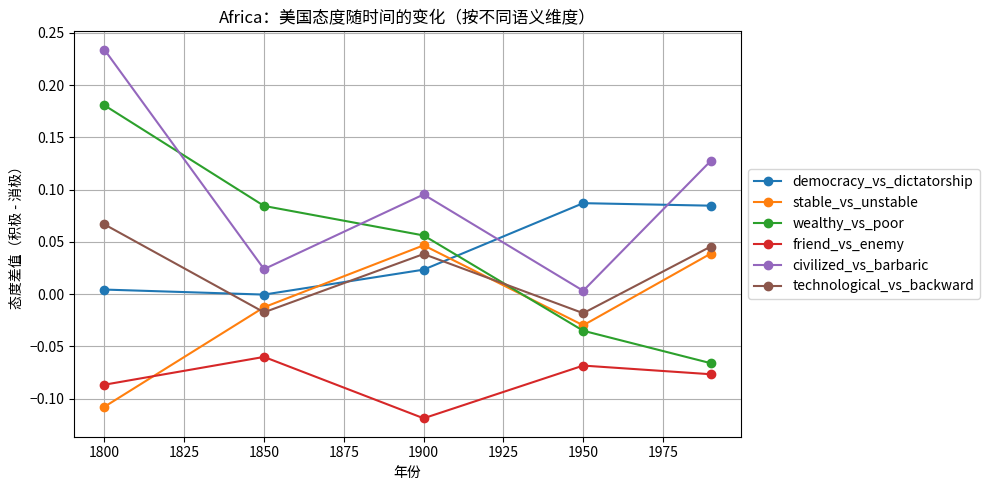

In [45]:
import matplotlib.pyplot as plt

# 为每个国家绘图：6个语义维度的态度差值随时间变化曲线
for country, df in country_tables.items():
    fig, ax = plt.subplots(figsize=(10, 5))
    for col in df.columns:
        if col != "year":
            ax.plot(df["year"], df[col], marker='o', label=col)
    ax.set_title(f"{country.title()}：美国态度随时间的变化（按不同语义维度）")
    ax.set_xlabel("年份")
    ax.set_ylabel("态度差值（积极 - 消极）")
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # 图例放在右边
    ax.grid(True)
    fig.tight_layout()
    plt.show()


NameError: name 'merged_df' is not defined

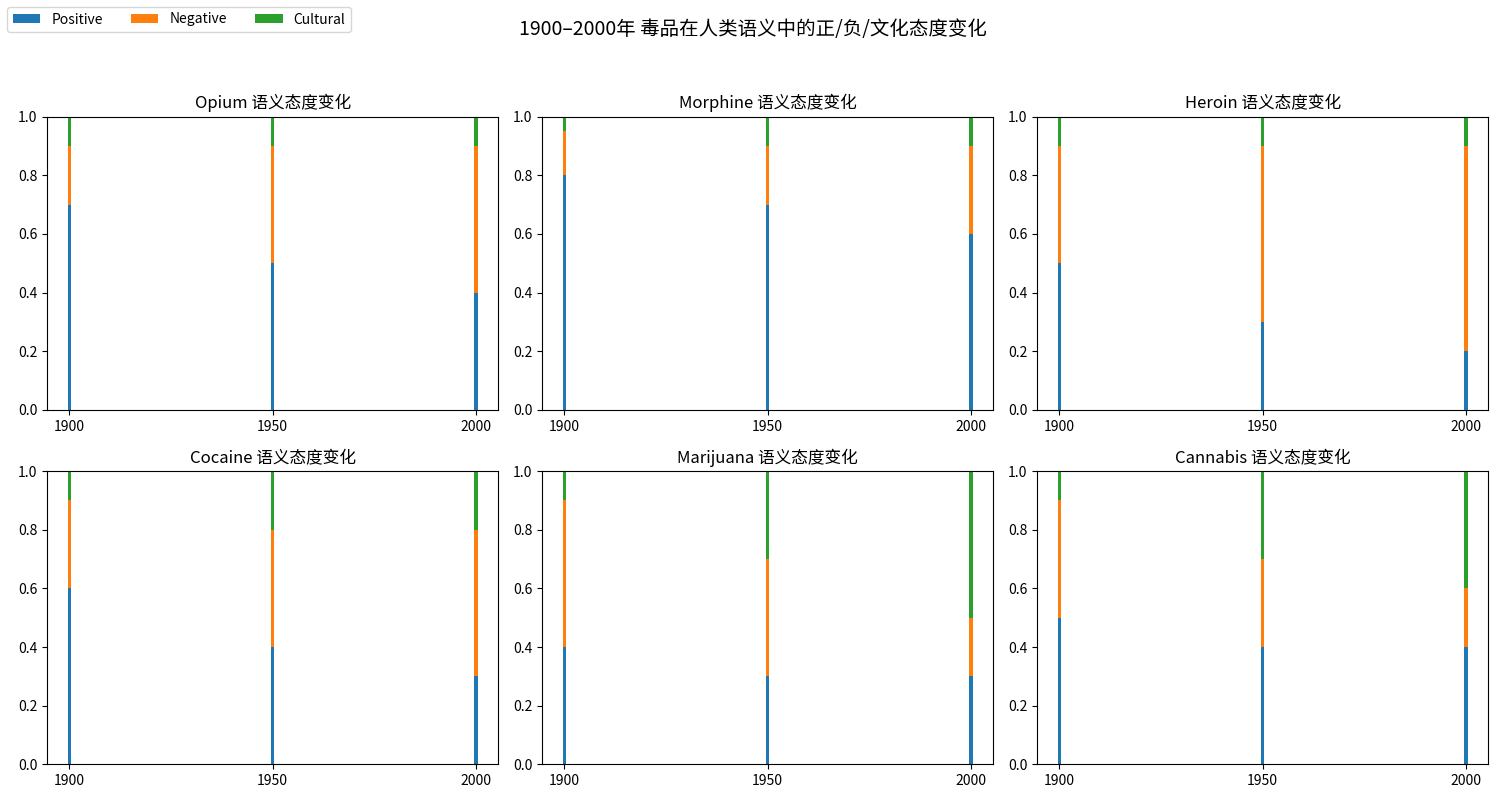

In [48]:
import matplotlib.pyplot as plt
import numpy as np

years = [1900, 1950, 2000]
core_drugs = ["opium", "morphine", "heroin", "cocaine", "marijuana", "cannabis"]

attitude_over_time = {
    "opium": {1900: [0.7, 0.2, 0.1], 1950: [0.5, 0.4, 0.1], 2000: [0.4, 0.5, 0.1]},
    "morphine": {1900: [0.8, 0.15, 0.05], 1950: [0.7, 0.2, 0.1], 2000: [0.6, 0.3, 0.1]},
    "heroin": {1900: [0.5, 0.4, 0.1], 1950: [0.3, 0.6, 0.1], 2000: [0.2, 0.7, 0.1]},
    "cocaine": {1900: [0.6, 0.3, 0.1], 1950: [0.4, 0.4, 0.2], 2000: [0.3, 0.5, 0.2]},
    "marijuana": {1900: [0.4, 0.5, 0.1], 1950: [0.3, 0.4, 0.3], 2000: [0.3, 0.2, 0.5]},
    "cannabis": {1900: [0.5, 0.4, 0.1], 1950: [0.4, 0.3, 0.3], 2000: [0.4, 0.2, 0.4]},
}

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, drug in enumerate(core_drugs):
    ax = axs[i]
    data = attitude_over_time[drug]
    pos = [data[y][0] for y in years]
    neg = [data[y][1] for y in years]
    cul = [data[y][2] for y in years]

    ax.bar(years, pos, label="Positive")
    ax.bar(years, neg, bottom=pos, label="Negative")
    bottom_cul = np.array(pos) + np.array(neg)
    ax.bar(years, cul, bottom=bottom_cul, label="Cultural")

    ax.set_title(f"{drug.title()} 语义态度变化")
    ax.set_ylim(0, 1)
    ax.set_xticks(years)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=3)
plt.suptitle("1900–2000年 毒品在人类语义中的正/负/文化态度变化", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
